In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [36]:
train = pd.read_csv("Train.csv")


In [37]:
train.head()


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [38]:
train.shape


(543, 8)

In [39]:
train.isna().sum()


City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

#EDA


In [41]:
train.describe()


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


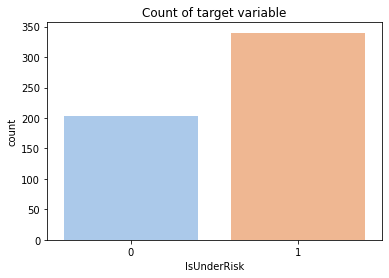

In [42]:
sns.countplot(train['IsUnderRisk'], palette = 'pastel')
plt.title('Count of target variable')
plt.show()

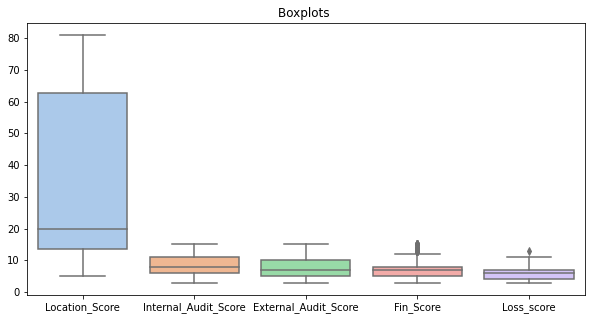

In [44]:
cont_var = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']

plt.figure(figsize = (10,5))
sns.boxplot(data= train[cont_var], palette = 'pastel')
plt.title('Boxplots ')
plt.show()

#Separating target variable


In [48]:
X = train.drop(['IsUnderRisk'], axis=1)
y = pd.Series(train['IsUnderRisk'])

#Normalizing Data


In [49]:
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)

#Splitting into train & test


In [50]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)


# DNN Model


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

In [52]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])


In [54]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2)


In [55]:
history1 = model.fit(x=x_train, y=y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/200
14/14 [==============================] - 1s 14ms/step - loss: 0.6707 - accuracy: 0.6406 - val_loss: 0.6714 - val_accuracy: 0.5688
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6429 - val_loss: 0.6656 - val_accuracy: 0.5688
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6526 - accuracy: 0.6452 - val_loss: 0.6599 - val_accuracy: 0.5688
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6464 - accuracy: 0.6406 - val_loss: 0.6549 - val_accuracy: 0.5688
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.6406 - val_loss: 0.6501 - val_accuracy: 0.5688
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6406 - val_loss: 0.6455 - val_accuracy: 0.5688
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.6406 - val_loss: 0.6411 - val_accuracy: 0.5688
Epoch 8/200


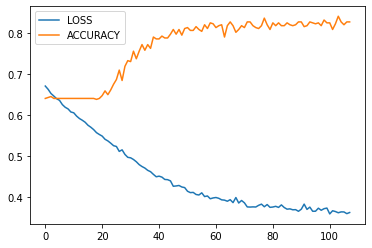

In [56]:
plt.plot(history1.history['loss'], label="LOSS")
plt.plot(history1.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

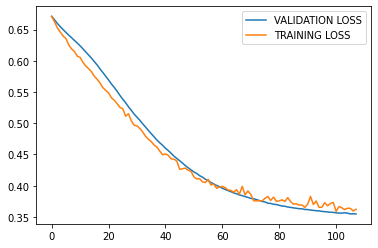

In [57]:
plt.plot(history1.history['val_loss'], label="VALIDATION LOSS")
plt.plot(history1.history['loss'], label="TRAINING LOSS")
plt.legend(loc='best')
plt.show()

#Predicting on test set


In [58]:
y_pred_prob = model.predict(x_test)


In [59]:
y_pred = []
for prob in y_pred_prob:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        47
           1       0.88      0.84      0.86        62

    accuracy                           0.84       109
   macro avg       0.84      0.84      0.84       109
weighted avg       0.85      0.84      0.84       109



#ROC-AUC Score


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss


In [62]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score is:", np.round(roc_auc,2))

ROC-AUC score is: 0.84


In [63]:
y_ = np.array(train['IsUnderRisk']).reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [64]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)


#DNN Model 2


In [65]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [66]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [69]:
history2 = model.fit(x=x_train, y=y_train, epochs=100)


Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7396
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7488
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7558
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4990 - accuracy: 0.7535
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7604
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7627
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7719
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7765
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7788
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7765
Epoch 11/

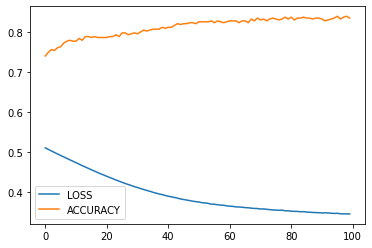

In [70]:
plt.plot(range(100), history2.history['loss'], label="LOSS")
plt.plot(range(100), history2.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

 test set


In [71]:
y_pred = model.predict(x_test)


#Log loss Error 


In [72]:
ll = log_loss(y_test, y_pred)
print("Log-Loss Error for the DNN model-2 is", np.round(ll,2))

Log-Loss Error for the DNN model-2 is 0.39
